In [1]:
import os

In [8]:
data_dir = "/home/lacie/Github/MasterStudy/ComputerVision/data/Simplycity/"

In [9]:
impath= os.listdir(data_dir)

In [10]:
impath

['6', '0', '7', '1', '4', '5', '3', '2', '9', '8']

In [12]:
!pip install opencv-python
!pip install opencv-contrib-python

  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
     |████████████████████████████████| 66.7 MB 2.4 MB/s eta 0:00:01     |██████▋                         | 13.8 MB 4.7 MB/s eta 0:00:12


In [13]:
import cv2
import numpy as np

In [14]:
# Tao list images va list id
train_image_list=[]
train_id=[]
test_image_list=[]
test_id=[]
for path in impath:
    class_path = data_dir + "/" +path
    image_names= os.listdir(class_path)
    image_path=[]
    image_id=[]
    for image in image_names:
        image_path.append(class_path+'/'+ image)
        image_id.append(int(path))
   # Chon ngau nhien 60 anh lam train,40 anh moi class lam anh test
    y=np.arange(100)
    np.random.shuffle(y)
    train_image_list+= [image_path[i] for i in y[0:60]]
    test_image_list+=[image_path[i] for i in y[60:100]]
    train_id+=[image_id[i] for i in y[0:60]]
    test_id+=[image_id[i] for i in y[60:100]]

In [16]:
# Tinh SIFT cho cac anh trong tap training:
sift = cv2.SIFT_create()
All_sift=[]# list contain all SIFT vectors from all training images:
for image in train_image_list:
    img = cv2.imread(image)
    kp, des = sift.detectAndCompute(img, None)
    for d in des:
        All_sift.append(d)

In [17]:
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


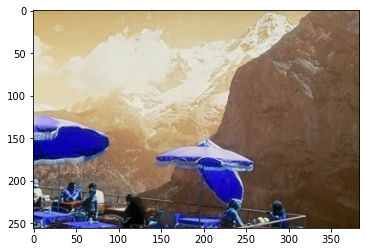

In [18]:
plt.imshow(img)
plt.show()

In [19]:
kp, des = sift.detectAndCompute(img, None)

In [20]:
des

array([[ 32.,  46.,  89., ...,   0.,   0.,   0.],
       [ 12.,   4.,  19., ...,  12.,  93.,  21.],
       [  2.,  10.,  29., ...,   4.,   9., 123.],
       ...,
       [ 24.,  80.,  32., ...,  22.,   2.,   1.],
       [ 11.,   5.,   3., ...,   7.,   9., 120.],
       [ 15.,  52., 128., ...,   0.,   0.,   2.]], dtype=float32)

In [21]:
np.shape(des)

(395, 128)

In [23]:
from sklearn.cluster import MiniBatchKMeans

In [24]:
##Thuc hien clustering tren SIFT-descriptors de tao codewords:
Number_code_words= 200
batch_size = 3000 # 3 * tong so anh=1000 
kmeans = MiniBatchKMeans(n_clusters=Number_code_words, batch_size=batch_size, verbose=1).fit(All_sift)

Init 1/3 with method: k-means++
Inertia for init 1/3: 727693161.258532
Init 2/3 with method: k-means++
Inertia for init 2/3: 726382771.980497
Init 3/3 with method: k-means++
Inertia for init 3/3: 728228911.677924
Minibatch iteration 1/13800: mean batch inertia: 83286.612041, ewa inertia: 83286.612041 
Minibatch iteration 2/13800: mean batch inertia: 82836.373413, ewa inertia: 83280.085740 
Minibatch iteration 3/13800: mean batch inertia: 82713.827380, ewa inertia: 83271.877709 
Minibatch iteration 4/13800: mean batch inertia: 82319.981366, ewa inertia: 83258.079777 
Minibatch iteration 5/13800: mean batch inertia: 82057.423161, ewa inertia: 83240.676014 
Minibatch iteration 6/13800: mean batch inertia: 81738.834222, ewa inertia: 83218.906510 
Minibatch iteration 7/13800: mean batch inertia: 82341.379236, ewa inertia: 83206.186572 
Minibatch iteration 8/13800: mean batch inertia: 81746.965825, ewa inertia: 83185.034869 
Minibatch iteration 9/13800: mean batch inertia: 80699.634439, ewa 

Minibatch iteration 90/13800: mean batch inertia: 80633.487709, ewa inertia: 81199.375169 
Minibatch iteration 91/13800: mean batch inertia: 79655.826373, ewa inertia: 81177.001113 
Minibatch iteration 92/13800: mean batch inertia: 79258.328685, ewa inertia: 81149.189564 
Minibatch iteration 93/13800: mean batch inertia: 79612.007756, ewa inertia: 81126.907799 
Minibatch iteration 94/13800: mean batch inertia: 80158.739000, ewa inertia: 81112.873994 
Minibatch iteration 95/13800: mean batch inertia: 79775.126498, ewa inertia: 81093.483071 
Minibatch iteration 96/13800: mean batch inertia: 79770.630375, ewa inertia: 81074.308051 
Minibatch iteration 97/13800: mean batch inertia: 81154.845018, ewa inertia: 81075.475450 
Minibatch iteration 98/13800: mean batch inertia: 79918.179906, ewa inertia: 81058.700215 
Minibatch iteration 99/13800: mean batch inertia: 80009.643137, ewa inertia: 81043.493918 
Minibatch iteration 100/13800: mean batch inertia: 79422.022339, ewa inertia: 81019.990356

Minibatch iteration 185/13800: mean batch inertia: 79452.400552, ewa inertia: 80237.308973 
Minibatch iteration 186/13800: mean batch inertia: 79790.059283, ewa inertia: 80230.825998 
Minibatch iteration 187/13800: mean batch inertia: 80121.377612, ewa inertia: 80229.239521 
Minibatch iteration 188/13800: mean batch inertia: 80339.715496, ewa inertia: 80230.840893 
Minibatch iteration 189/13800: mean batch inertia: 79248.968766, ewa inertia: 80216.608455 
Minibatch iteration 190/13800: mean batch inertia: 80390.332497, ewa inertia: 80219.126621 
Minibatch iteration 191/13800: mean batch inertia: 79578.264112, ewa inertia: 80209.837188 
Minibatch iteration 192/13800: mean batch inertia: 80000.651928, ewa inertia: 80206.805005 
Minibatch iteration 193/13800: mean batch inertia: 79490.684298, ewa inertia: 80196.424689 
Minibatch iteration 194/13800: mean batch inertia: 80248.558562, ewa inertia: 80197.180380 
Minibatch iteration 195/13800: mean batch inertia: 80053.108930, ewa inertia: 80

Minibatch iteration 284/13800: mean batch inertia: 79782.914848, ewa inertia: 79862.188163 
Minibatch iteration 285/13800: mean batch inertia: 80434.714422, ewa inertia: 79870.487049 
Minibatch iteration 286/13800: mean batch inertia: 79085.681027, ewa inertia: 79859.111125 
Minibatch iteration 287/13800: mean batch inertia: 80058.146091, ewa inertia: 79861.996177 
Minibatch iteration 288/13800: mean batch inertia: 80148.862505, ewa inertia: 79866.154363 
Minibatch iteration 289/13800: mean batch inertia: 79735.628142, ewa inertia: 79864.262359 
Minibatch iteration 290/13800: mean batch inertia: 78836.987554, ewa inertia: 79849.371801 
Minibatch iteration 291/13800: mean batch inertia: 79208.923569, ewa inertia: 79840.088373 
Minibatch iteration 292/13800: mean batch inertia: 79318.950113, ewa inertia: 79832.534367 
Minibatch iteration 293/13800: mean batch inertia: 79783.769408, ewa inertia: 79831.827509 
Minibatch iteration 294/13800: mean batch inertia: 80387.836721, ewa inertia: 79

In [25]:
kmeans.verbose = False

train_img_bow = []

for image in train_image_list:
    img = cv2.imread(image)
    kp, des = sift.detectAndCompute(img, None) # kp: keypoint, des: descriptors

    histo = np.zeros(Number_code_words) #
    nkp = np.size(kp)  #nkp: number of keypoints

    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1
        
    histo=np.array(histo) # chuyen ve dang vector numpy
    histo=histo/nkp # normalized

    train_img_bow.append(histo)

In [26]:
## Do the same with test image:

kmeans.verbose = False

test_img_bow = []

for image in test_image_list:
    img = cv2.imread(image)
    kp, des = sift.detectAndCompute(img, None) # kp: keypoint, des: descriptors

    histo = np.zeros(Number_code_words) #
    nkp = np.size(kp)  #nkp: number of keypoints

    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1
        
    histo=np.array(histo) # chuyen ve dang vector numpy
    histo=histo/nkp # normalized

    test_img_bow.append(histo)
    

In [27]:
train_id = np.array(train_id)
test_id = np.array(test_id)

In [28]:
## Su dung SVM Classification:
X = np.array(train_img_bow)
Testbow=np.array(test_img_bow)
Y = train_id

from sklearn.svm import SVC

In [29]:
X = np.array(train_img_bow)
Testbow=np.array(test_img_bow)
Y = train_id

from sklearn.svm import SVC


classifier = SVC(gamma=30, C=10.0)
classifier.fit(X,Y)
res=classifier.predict(Testbow)

accuracy = sum(res==test_id)/len(test_id)
accuracy

0.6725

In [30]:
classifier = SVC(C=2.5,kernel='rbf',gamma='scale')
classifier.fit(X,Y)
res=classifier.predict(Testbow)
accuracy = sum(res==test_id)/len(test_id)
accuracy

0.7025

In [31]:
# Su dung Neuron net de phan loai:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(verbose=True, max_iter=600000)
mlp.fit(X, Y)

Iteration 1, loss = 2.31050695
Iteration 2, loss = 2.30716535
Iteration 3, loss = 2.30421580
Iteration 4, loss = 2.30167910
Iteration 5, loss = 2.29937707
Iteration 6, loss = 2.29669722
Iteration 7, loss = 2.29468080
Iteration 8, loss = 2.29236658
Iteration 9, loss = 2.29015061
Iteration 10, loss = 2.28808179
Iteration 11, loss = 2.28580457
Iteration 12, loss = 2.28375156
Iteration 13, loss = 2.28130915
Iteration 14, loss = 2.27908663
Iteration 15, loss = 2.27657450
Iteration 16, loss = 2.27406377
Iteration 17, loss = 2.27160838
Iteration 18, loss = 2.26898685
Iteration 19, loss = 2.26634120
Iteration 20, loss = 2.26344973
Iteration 21, loss = 2.26049036
Iteration 22, loss = 2.25750521
Iteration 23, loss = 2.25442152
Iteration 24, loss = 2.25111491
Iteration 25, loss = 2.24776174
Iteration 26, loss = 2.24432422
Iteration 27, loss = 2.24063276
Iteration 28, loss = 2.23683364
Iteration 29, loss = 2.23297288
Iteration 30, loss = 2.22887117
Iteration 31, loss = 2.22469086
Iteration 32, los

Iteration 254, loss = 1.11618246
Iteration 255, loss = 1.11395801
Iteration 256, loss = 1.11116471
Iteration 257, loss = 1.10905219
Iteration 258, loss = 1.10654824
Iteration 259, loss = 1.10447591
Iteration 260, loss = 1.10181149
Iteration 261, loss = 1.09967672
Iteration 262, loss = 1.09723358
Iteration 263, loss = 1.09504053
Iteration 264, loss = 1.09281438
Iteration 265, loss = 1.09042401
Iteration 266, loss = 1.08822742
Iteration 267, loss = 1.08588082
Iteration 268, loss = 1.08353324
Iteration 269, loss = 1.08138170
Iteration 270, loss = 1.07915312
Iteration 271, loss = 1.07688290
Iteration 272, loss = 1.07453460
Iteration 273, loss = 1.07227874
Iteration 274, loss = 1.07021761
Iteration 275, loss = 1.06777222
Iteration 276, loss = 1.06551123
Iteration 277, loss = 1.06341726
Iteration 278, loss = 1.06135493
Iteration 279, loss = 1.05894672
Iteration 280, loss = 1.05699270
Iteration 281, loss = 1.05470503
Iteration 282, loss = 1.05242025
Iteration 283, loss = 1.05048587
Iteration 

Iteration 513, loss = 0.67302647
Iteration 514, loss = 0.67169241
Iteration 515, loss = 0.67059875
Iteration 516, loss = 0.66959039
Iteration 517, loss = 0.66802468
Iteration 518, loss = 0.66691566
Iteration 519, loss = 0.66565048
Iteration 520, loss = 0.66453853
Iteration 521, loss = 0.66350326
Iteration 522, loss = 0.66219916
Iteration 523, loss = 0.66110972
Iteration 524, loss = 0.65998455
Iteration 525, loss = 0.65853807
Iteration 526, loss = 0.65720732
Iteration 527, loss = 0.65615022
Iteration 528, loss = 0.65486036
Iteration 529, loss = 0.65372223
Iteration 530, loss = 0.65267624
Iteration 531, loss = 0.65142522
Iteration 532, loss = 0.65024067
Iteration 533, loss = 0.64894608
Iteration 534, loss = 0.64835778
Iteration 535, loss = 0.64708115
Iteration 536, loss = 0.64555465
Iteration 537, loss = 0.64465730
Iteration 538, loss = 0.64320505
Iteration 539, loss = 0.64217441
Iteration 540, loss = 0.64115116
Iteration 541, loss = 0.63996565
Iteration 542, loss = 0.63882510
Iteration 

Iteration 819, loss = 0.40171097
Iteration 820, loss = 0.40120905
Iteration 821, loss = 0.40061375
Iteration 822, loss = 0.39984045
Iteration 823, loss = 0.39917542
Iteration 824, loss = 0.39853671
Iteration 825, loss = 0.39795614
Iteration 826, loss = 0.39741210
Iteration 827, loss = 0.39662732
Iteration 828, loss = 0.39602987
Iteration 829, loss = 0.39538289
Iteration 830, loss = 0.39484373
Iteration 831, loss = 0.39430675
Iteration 832, loss = 0.39371623
Iteration 833, loss = 0.39311275
Iteration 834, loss = 0.39233890
Iteration 835, loss = 0.39157222
Iteration 836, loss = 0.39116179
Iteration 837, loss = 0.39039828
Iteration 838, loss = 0.38983257
Iteration 839, loss = 0.38917572
Iteration 840, loss = 0.38857591
Iteration 841, loss = 0.38814299
Iteration 842, loss = 0.38750902
Iteration 843, loss = 0.38671021
Iteration 844, loss = 0.38615362
Iteration 845, loss = 0.38556592
Iteration 846, loss = 0.38503019
Iteration 847, loss = 0.38423465
Iteration 848, loss = 0.38383205
Iteration 

Iteration 1118, loss = 0.25442287
Iteration 1119, loss = 0.25415422
Iteration 1120, loss = 0.25382572
Iteration 1121, loss = 0.25342795
Iteration 1122, loss = 0.25296983
Iteration 1123, loss = 0.25255323
Iteration 1124, loss = 0.25219704
Iteration 1125, loss = 0.25185617
Iteration 1126, loss = 0.25157304
Iteration 1127, loss = 0.25109277
Iteration 1128, loss = 0.25071086
Iteration 1129, loss = 0.25045072
Iteration 1130, loss = 0.25005643
Iteration 1131, loss = 0.24966266
Iteration 1132, loss = 0.24934043
Iteration 1133, loss = 0.24893847
Iteration 1134, loss = 0.24860689
Iteration 1135, loss = 0.24820544
Iteration 1136, loss = 0.24779836
Iteration 1137, loss = 0.24741295
Iteration 1138, loss = 0.24699713
Iteration 1139, loss = 0.24665926
Iteration 1140, loss = 0.24651403
Iteration 1141, loss = 0.24596715
Iteration 1142, loss = 0.24549119
Iteration 1143, loss = 0.24517882
Iteration 1144, loss = 0.24471512
Iteration 1145, loss = 0.24458763
Iteration 1146, loss = 0.24422067
Iteration 1147

Iteration 1439, loss = 0.15846879
Iteration 1440, loss = 0.15816048
Iteration 1441, loss = 0.15797045
Iteration 1442, loss = 0.15780818
Iteration 1443, loss = 0.15754762
Iteration 1444, loss = 0.15748955
Iteration 1445, loss = 0.15699997
Iteration 1446, loss = 0.15683270
Iteration 1447, loss = 0.15649078
Iteration 1448, loss = 0.15639884
Iteration 1449, loss = 0.15601843
Iteration 1450, loss = 0.15578922
Iteration 1451, loss = 0.15560911
Iteration 1452, loss = 0.15539624
Iteration 1453, loss = 0.15513092
Iteration 1454, loss = 0.15496464
Iteration 1455, loss = 0.15467449
Iteration 1456, loss = 0.15441187
Iteration 1457, loss = 0.15418865
Iteration 1458, loss = 0.15401232
Iteration 1459, loss = 0.15376578
Iteration 1460, loss = 0.15374265
Iteration 1461, loss = 0.15341270
Iteration 1462, loss = 0.15306614
Iteration 1463, loss = 0.15286880
Iteration 1464, loss = 0.15271340
Iteration 1465, loss = 0.15260156
Iteration 1466, loss = 0.15218239
Iteration 1467, loss = 0.15193541
Iteration 1468

Iteration 1708, loss = 0.10605230
Iteration 1709, loss = 0.10599487
Iteration 1710, loss = 0.10576562
Iteration 1711, loss = 0.10553459
Iteration 1712, loss = 0.10554369
Iteration 1713, loss = 0.10521712
Iteration 1714, loss = 0.10510846
Iteration 1715, loss = 0.10493262
Iteration 1716, loss = 0.10479100
Iteration 1717, loss = 0.10461712
Iteration 1718, loss = 0.10449456
Iteration 1719, loss = 0.10433383
Iteration 1720, loss = 0.10411542
Iteration 1721, loss = 0.10398494
Iteration 1722, loss = 0.10388152
Iteration 1723, loss = 0.10364188
Iteration 1724, loss = 0.10357639
Iteration 1725, loss = 0.10335343
Iteration 1726, loss = 0.10339111
Iteration 1727, loss = 0.10305268
Iteration 1728, loss = 0.10293848
Iteration 1729, loss = 0.10285262
Iteration 1730, loss = 0.10257430
Iteration 1731, loss = 0.10244311
Iteration 1732, loss = 0.10228112
Iteration 1733, loss = 0.10213038
Iteration 1734, loss = 0.10204037
Iteration 1735, loss = 0.10189150
Iteration 1736, loss = 0.10168370
Iteration 1737

Iteration 1987, loss = 0.07023453
Iteration 1988, loss = 0.07013703
Iteration 1989, loss = 0.07003824
Iteration 1990, loss = 0.06994580
Iteration 1991, loss = 0.06989409
Iteration 1992, loss = 0.06973390
Iteration 1993, loss = 0.06958493
Iteration 1994, loss = 0.06958063
Iteration 1995, loss = 0.06939168
Iteration 1996, loss = 0.06939482
Iteration 1997, loss = 0.06924444
Iteration 1998, loss = 0.06925785
Iteration 1999, loss = 0.06906154
Iteration 2000, loss = 0.06900544
Iteration 2001, loss = 0.06887279
Iteration 2002, loss = 0.06885855
Iteration 2003, loss = 0.06867105
Iteration 2004, loss = 0.06852923
Iteration 2005, loss = 0.06845061
Iteration 2006, loss = 0.06838570
Iteration 2007, loss = 0.06824213
Iteration 2008, loss = 0.06812785
Iteration 2009, loss = 0.06806827
Iteration 2010, loss = 0.06796663
Iteration 2011, loss = 0.06782767
Iteration 2012, loss = 0.06777317
Iteration 2013, loss = 0.06769109
Iteration 2014, loss = 0.06764138
Iteration 2015, loss = 0.06745978
Iteration 2016

MLPClassifier(max_iter=600000, verbose=True)

In [32]:
res=mlp.predict(Testbow)
accuracy = sum(res==test_id)/len(test_id)
accuracy

0.67

In [36]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import exposure

#For each image:
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

In [37]:
fd

array([0.5       , 0.        , 0.5       , ..., 0.37819385, 0.37095792,
       0.26268762])

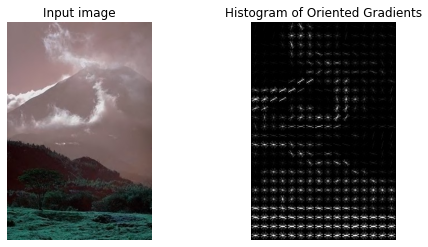

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()